<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Chap -4- Machine learning applications/1-les Bases.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction sur Sklearn 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import style
style.use('ggplot')


## Régression

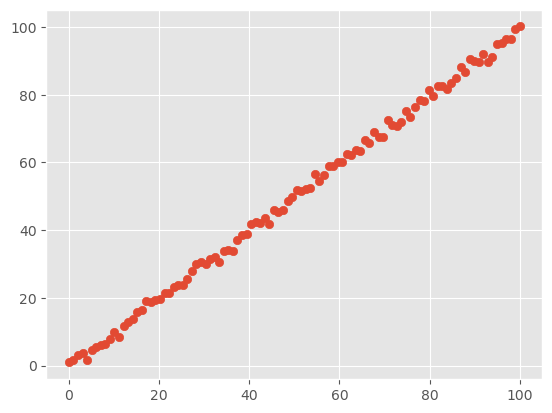

In [2]:
m=100
x=np.linspace(0,100,m).reshape(m,1)
y=x+np.random.randn(m,1)
plt.scatter(x,y)

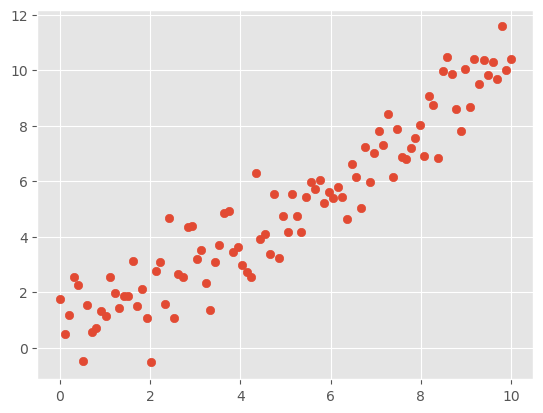

In [3]:
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1)
y = X + np.random.randn(m, 1)

plt.scatter(X, y)

In [5]:
from sklearn.linear_model import LinearRegression
#model=linearitregression

In [6]:
model = LinearRegression()
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation avec le coefficient de corrélation

0.8881140743377214

NameError: name 'model' is not defined

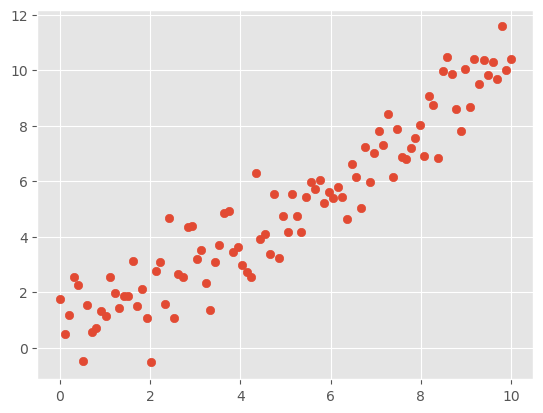

In [4]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='b')

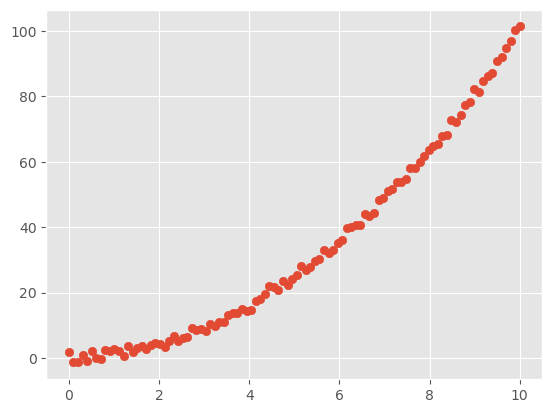

In [8]:
X = np.linspace(0, 10, m).reshape(m,1)
y = X**2 + np.random.randn(m, 1)

plt.scatter(X, y)

In [ ]:
from sklearn.svm import SVR
y =y.ravel()
model = SVR(C =100)
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation avec le coefficient de corrélation

NameError: name 'model' is not defined

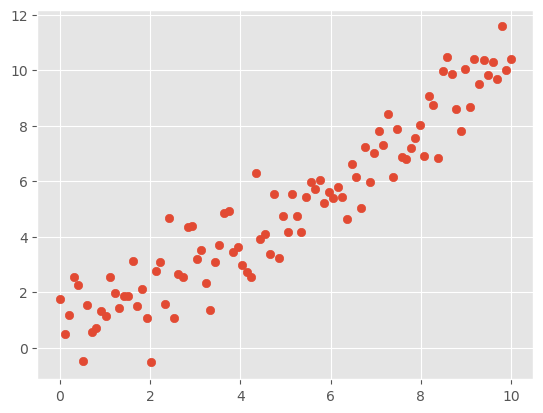

In [6]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='red')

## Classification

In [7]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
model = KNeighborsClassifier()

In [10]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [11]:
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation

C:\Users\SINA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8417366946778712

 Prediction de survie

In [12]:
def survie(model, pclass=3, sex=0, age=26):
  x = np.array([pclass, sex, age]).reshape(1, 3)
  print(model.predict(x))
  print(model.predict_proba(x))

In [13]:
survie(model)

[0]
[[0.8 0.2]]


C:\Users\SINA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\SINA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SINA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Exercice et Solution
Écrire un code qui permet de trouver la meilleure valeur de voisin n_neighbors pour le modele de KNeighborsClassifier.

Dans sklearn, il est possible de faire cela avec la classe GridSearchCV. Mais il peut également etre utile de savoir écrire soi-meme ce genre de code de recherche.

In [34]:
# SOLUTION
score = []
best_k = 1
best_score = 0

for k in range(best_k, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    score.append(model.score(X, y))
    
    if best_score < model.score(X, y):
        best_k = k
        best_score = model.score(X, y)

print(best_k)
plt.plot(score)

ValueError: Unknown label type: 'continuous'

Exercice 2

In [15]:
bitcoin = pd.read_csv('Datasets/BTC-EUR.csv', index_col='Date', parse_dates=True)
bitcoin.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


In [16]:
df =bitcoin.copy()

<AxesSubplot:xlabel='Date'>

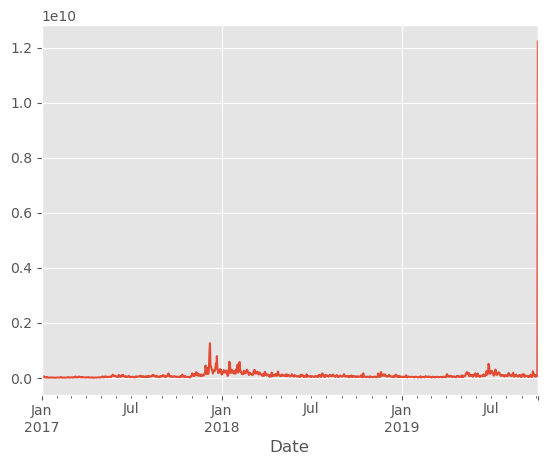

In [17]:
bitcoin['2017':'2019']['Volume'].plot()

In [18]:
df =df[['Open',	'High',	'Low',	'Adj Close','Volume']]
df =df[:-1]

In [19]:
df['HL_PCT']= (df['High']-df['Adj Close'])/df['Adj Close']
df['PCT_change']= (df['Adj Close']-df['Open'])/df['Open']

In [20]:
df =df[['Adj Close','HL_PCT','PCT_change','Volume']]

In [21]:
forecasst_col='Adj Close'

In [22]:
import math
forecasst_out = int(math.ceil(0.01*len(df)))
forecasst_out

30

In [23]:
df['target']= df[forecasst_col].shift(-forecasst_out)
df.tail()

,Adj Close,HL_PCT,PCT_change,Volume,target
Date,,,,,
2019-09-29,7375.950195,0.022379,-0.019548,39755968,NaN
2019-09-30,7626.029785,0.005489,0.033905,101457908,NaN
2019-10-01,7625.560059,0.025273,-0.000062,75644316,NaN
2019-10-02,7655.250000,0.001048,0.003893,51871334,NaN
2019-10-03,7516.790039,0.022502,-0.018087,49437308,NaN


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [25]:
scaler = StandardScaler()
tmp = df.drop('target',1)
tmp=scaler.fit_transform(tmp)
X=tmp[:-forecasst_out]
X_last_value=tmp[-forecasst_out:]
print(df.shape,X.shape,X_last_value.shape)

(2922, 5) (2892, 4) (30, 4)


C:\Users\SINA\AppData\Local\Temp\ipykernel_18592\772332389.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = df.drop('target',1)


In [26]:

y =df['target']
y=y.dropna()
print(y.shape,df.shape,X.shape,X_last_value.shape)

(2892,) (2922, 5) (2892, 4) (30, 4)


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7)

In [28]:
LR = LinearRegression().fit(X_train,y_train)

In [29]:
import pickle

with open( 'LRmodel.pickle','wb') as f:
    pickle.dump(LR,f)

In [30]:
pickle_in = open('LRmodel.pickle', 'rb')
LR= pickle.load(pickle_in)

In [31]:
Confidance=LR.score(X_test,y_test)
print(Confidance)

0.8673499977285973


In [32]:
ForecastLR ,sigma = LR.predict(X_last_value,return_std=True)


TypeError: predict() got an unexpected keyword argument 'return_std'

In [33]:
list_of_tuples = list(zip(df.index[-forecasst_out:], ForecastLR))
dfLR = pd.DataFrame(list_of_tuples,columns=['date','forecast'])
dfLR.set_index('date',inplace =True)
dfLR

NameError: name 'ForecastLR' is not defined

In [ ]:

df_temp=df
plt.figure(figsize=(20,10))
df_temp[dfLR.index[0]:dfLR.index[-1]]['Adj Close'].plot()
dfLR['forecast'].plot()
plt.fill_between(dfLR.index, dfLR['forecast']+(dfLR['forecast']*(1-Confidance)),
                          dfLR['forecast']-(dfLR['forecast']*(1-Confidance)), 
                   alpha=0.2, label='min-max Predictions')